In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Классификация жанров музыки

In [2]:
data_raw = pd.read_csv("music_genre_classification.csv")
data_raw

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [3]:
data = data_raw.copy()
data.loc[data["duration_in min/ms"] < 100, "duration_in min/ms"] *= 60000
data.rename(columns={"duration_in min/ms": "duration"}, inplace=True)

In [4]:
class_name = [
    "Acoustic/Folk",
    "Alt",
    "Blues",
    "Bollywood",
    "Country",
    "HipHop",
    "Indie",
    "Instrumental",
    "Metal",
    "Pop",
    "Rock",
]
class_mapping = {i: class_name[i] for i in range(11)}
# data["Class"] = data["Class"].map(class_mapping)
data["Class"].unique()

array([ 5, 10,  6,  2,  4,  8,  9,  3,  7,  1,  0])

In [5]:
data.rename(
    columns={
        "Artist Name": "artist",
        "Track Name": "track",
        "Popularity": "popularity",
        "Class": "class",
    },
    inplace=True,
)

In [6]:
na_count = data.isna().sum()
col_with_missing_values = na_count[na_count > 0].index.to_list()
col_with_missing_values

['popularity', 'key', 'instrumentalness']

In [7]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer().set_output(transform="pandas")
data[col_with_missing_values] = imp.fit_transform(data[col_with_missing_values])

In [8]:
categorical_columns = ["key", "mode", "time_signature", "class"]
data[categorical_columns] = data[categorical_columns].astype("category")

In [9]:
data = data.drop(columns=["track"])

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data["artist"] = encoder.fit_transform(data["artist"])

In [11]:
data["artist"] = data["artist"].astype("category")

In [12]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["class"])
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

In [15]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [16]:
rf.score(X_train, y_train)

0.9273171815959103

In [17]:
rf.score(X_test, y_test)

0.4525450100022227

In [67]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_features": [2, 4, 7, 10, 14],
    "min_samples_leaf": [1, 3, 5, 7],
    "max_depth": [5, 10, 15, 20],
}

tuned_rfc = GridSearchCV(
    RandomForestClassifier(oob_score=True, random_state=42),
    parameters,
    cv=skf,
    n_jobs=-1,
)

tuned_rfc.fit(X_train, y_train)

c:\oleg-w570\machine-learning\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [2, 4, 7, 10, 14],
                         'min_samples_leaf': [1, 3, 5, 7]})

In [88]:
importances = tuned_rfc.best_estimator_.feature_importances_
features = X.columns
importances

array([0.04521129, 0.08018728, 0.09603767, 0.09861587, 0.01926514,
       0.07242997, 0.00750448, 0.12811215, 0.14230007, 0.09226971,
       0.03649514, 0.07159024, 0.04126394, 0.06608792, 0.00262913])

In [89]:
importances_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importances_df = importances_df.sort_values('Importance', ascending=False)

<Axes: xlabel='Importance', ylabel='Feature'>

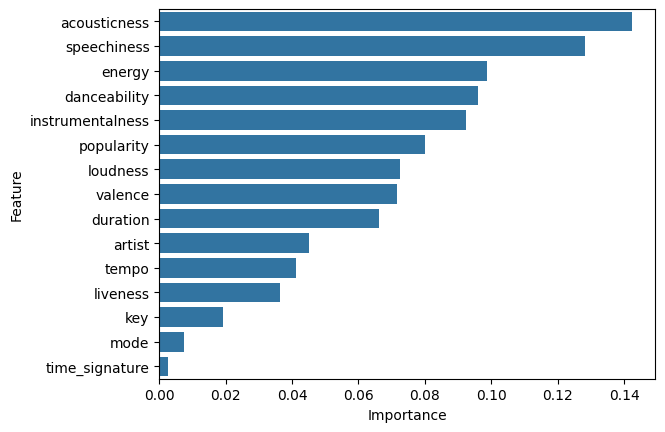

In [97]:
sns.barplot(importances_df, x='Importance', y='Feature')

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [19]:
etc.score(X_train, y_train)

0.9273171815959103

In [20]:
etc.score(X_test, y_test)

0.4449877750611247

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [104]:
gbc.score(X_train, y_train)

0.6013929021263985

In [105]:
gbc.score(X_test, y_test)

0.5052233829739943